# First dataset

In [4]:
def my_csv_loader(filename, typemap = {}, debug = False):

    column_names = []
    column_names_to_index = {}
    rows = []

    with open(filename) as f:

        # First line contains column names
        column_names.extend(next(f).rstrip("\n").split(","))

        # Map column name to zero based column index
        for i, c in enumerate(column_names):
            column_names_to_index[c] = i

        if debug:
            print(column_names)

        # Now load all the rows
        for line in f:

            vals = line.rstrip("\n").split(",")

            # All the values are now in string, perform type mapping (if any)
            for f,t in typemap.items():
                column_index = column_names_to_index[f]
                vals[column_index] = t(vals[column_index])

            rows.append(vals)

            if debug and len(rows) < 5:
                print(rows)


    return column_names, rows

column_names, rows = my_csv_loader("pop_year_trim.csv", {"2016" : int, "2017" : int, "2018" : int, "2019" : int, "2020" : int}, debug = True)


['', 'region', 'level of education', '2016', '2017', '2018', '2019', '2020']
[['0', '01 Stockholm county', 'no information about level of educational attainment', 36560, 39554, 42113, 45984, 47399]]
[['0', '01 Stockholm county', 'no information about level of educational attainment', 36560, 39554, 42113, 45984, 47399], ['1', '01 Stockholm county', 'post secondary education', 739424, 759083, 780086, 798639, 815468]]
[['0', '01 Stockholm county', 'no information about level of educational attainment', 36560, 39554, 42113, 45984, 47399], ['1', '01 Stockholm county', 'post secondary education', 739424, 759083, 780086, 798639, 815468], ['2', '01 Stockholm county', 'primary and lower secondary education', 254596, 254036, 254721, 254916, 254066]]
[['0', '01 Stockholm county', 'no information about level of educational attainment', 36560, 39554, 42113, 45984, 47399], ['1', '01 Stockholm county', 'post secondary education', 739424, 759083, 780086, 798639, 815468], ['2', '01 Stockholm county', '

In [6]:
import pandas as pd

# Load the data into a pandas DataFrame
df_first = pd.DataFrame(rows, columns=column_names)
# Use the first unnamed column as the index of the DF
df_first = df_first.set_index("")
df_first

,region,level of education,2016,2017,2018,2019,2020
,,,,,,,
0,01 Stockholm county,no information about level of educational atta...,36560,39554,42113,45984,47399
1,01 Stockholm county,post secondary education,739424,759083,780086,798639,815468
2,01 Stockholm county,primary and lower secondary education,254596,254036,254721,254916,254066
4,01 Stockholm county,upper secondary education,616508,619697,619102,618354,616364
5,03 Uppsala county,no information about level of educational atta...,3729,4244,4787,5272,5197
...,...,...,...,...,...,...,...
99,24 Västerbotten county,upper secondary education,90502,90514,90429,89976,89890
100,25 Norrbotten county,no information about level of educational atta...,2090,2091,2284,2567,2618
101,25 Norrbotten county,post secondary education,55721,56470,56988,57262,57884


In [7]:
import common_functions as cf

df_first.region.unique()

array(['01 Stockholm county', '03 Uppsala county',
       '04 Södermanland county', '05 Östergötland county',
       '06 Jönköping county', '07 Kronoberg county', '08 Kalmar county',
       '09 Gotland county', '10 Blekinge county', '12 Skåne county',
       '13 Halland county', '14 Västra Götaland county',
       '17 Värmland county', '18 Örebro county', '19 Västmanland county',
       '20 Dalarna county', '21 Gävleborg county',
       '22 Västernorrland county', '23 Jämtland county',
       '24 Västerbotten county', '25 Norrbotten county'], dtype=object)

In [8]:
df_post_sec = df_first[df_first["level of education"] == "post secondary education"]
df_post_sec

,region,level of education,2016,2017,2018,2019,2020
,,,,,,,
1,01 Stockholm county,post secondary education,739424,759083,780086,798639,815468
6,03 Uppsala county,post secondary education,109558,112371,115469,118174,120953
11,04 Södermanland county,post secondary education,57884,59369,60789,61865,62861
16,05 Östergötland county,post secondary education,113978,117283,119769,122180,124378
21,06 Jönköping county,post secondary education,73668,76040,78010,79460,81054
26,07 Kronoberg county,post secondary education,43876,45130,46345,47125,47929
31,08 Kalmar county,post secondary education,49867,51128,52072,52687,53452
36,09 Gotland county,post secondary education,12583,12977,13230,13519,13895
41,10 Blekinge county,post secondary education,36034,36866,37305,37554,37986


In [9]:
from matplotlib import pyplot as plt

In [10]:
pops = df_post_sec[df_post_sec.region == "25 Norrbotten county"][["2016", "2017", "2018", "2019", "2020"]].values[0]

print("Mean population with post-secondary education in the Norrbotten region in the last 5 years", cf.my_mean(pops))
print("Standard deviation population with post-secondary education in the Norrbotten region in the last 5 years", cf.my_std(pops))

Mean population with post-secondary education in the Norrbotten region in the last 5 years 56865.0
Standard deviation population with post-secondary education in the Norrbotten region in the last 5 years 731.5545092472604


In [11]:
# Calculate mean population for each region 2016-2020 and add as a column in the original DataFrame
df_sum_by_region = df_first.groupby("region")[["2016", "2017", "2018", "2019", "2020"]].sum().reset_index()

df_sum_by_region["mean_population"] = [cf.my_mean(p) for p in df_sum_by_region[["2016", "2017", "2018", "2019", "2020"]].values]

df_sum_by_region

,region,2016,2017,2018,2019,2020,mean_population
0,01 Stockholm county,1647088,1672370,1696022,1717893,1733297,1693334.0
1,03 Uppsala county,263678,268655,273058,277554,281029,272794.8
2,04 Södermanland county,204831,207175,208806,210189,210685,208337.2
3,05 Östergötland county,326677,330689,332748,334273,335837,332044.8
4,06 Jönköping county,250079,253040,255274,256699,257518,254522.0
5,07 Kronoberg county,137173,139233,140867,141706,142214,140238.6
6,08 Kalmar county,172272,174210,174491,174252,174075,173860.0
7,09 Gotland county,42636,42855,42991,43109,43268,42971.8
8,10 Blekinge county,112124,112933,113076,112675,112247,112611.0
9,12 Skåne county,948173,960493,970763,979283,987344,969211.2


<AxesSubplot:xlabel='region'>

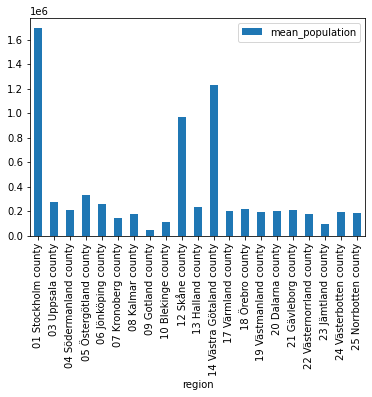

In [12]:
# Do a bar plot showing mean population per region
df_sum_by_region[["region", "mean_population"]].set_index("region").plot.bar()

# Second dataset

In [13]:
column_names, rows = my_csv_loader("avg_inc_2.csv", {"2016" : float, "2017" : float, "2018" : float, "2019" : float, "2020" : float}, debug = True)

df_second = pd.DataFrame()

# Load the data into a pandas DataFrame
df_second = pd.DataFrame(rows, columns=column_names)
# Use the first unnamed column as the index of the DF
df_second = df_second.set_index("")
df_second

['', 'region', 'level of education', 'sex', '2016', '2017', '2018', '2019', '2020']
[['0', '01 Stockholm county', 'no information about level of educational attainment', 'men', 1830.4, 1761.7, 1854.4, 1866.0, 1926.7]]
[['0', '01 Stockholm county', 'no information about level of educational attainment', 'men', 1830.4, 1761.7, 1854.4, 1866.0, 1926.7], ['1', '01 Stockholm county', 'no information about level of educational attainment', 'women', 960.2, 965.8, 962.8, 1001.0, 1015.9]]
[['0', '01 Stockholm county', 'no information about level of educational attainment', 'men', 1830.4, 1761.7, 1854.4, 1866.0, 1926.7], ['1', '01 Stockholm county', 'no information about level of educational attainment', 'women', 960.2, 965.8, 962.8, 1001.0, 1015.9], ['2', '01 Stockholm county', 'post secondary education', 'men', 3593.8, 3670.6000000000004, 3782.9, 3861.1, 3955.4]]
[['0', '01 Stockholm county', 'no information about level of educational attainment', 'men', 1830.4, 1761.7, 1854.4, 1866.0, 1926.7],

,region,level of education,sex,2016,2017,2018,2019,2020
,,,,,,,,
0,01 Stockholm county,no information about level of educational atta...,men,1830.4,1761.7,1854.4,1866.0,1926.7
1,01 Stockholm county,no information about level of educational atta...,women,960.2,965.8,962.8,1001.0,1015.9
2,01 Stockholm county,post secondary education,men,3593.8,3670.6,3782.9,3861.1,3955.4
3,01 Stockholm county,post secondary education,women,2633.6,2712.7,2782.9,2873.7,2915.2
4,01 Stockholm county,primary and lower secondary education,men,1895.7,1929.7,1970.2,1998.6,2011.7
...,...,...,...,...,...,...,...,...
203,25 Norrbotten county,post secondary education,women,2215.0,2273.2,2333.7,2393.4,2432.0
204,25 Norrbotten county,primary and lower secondary education,men,1858.3,1893.9,1947.9,2015.0,2049.6
205,25 Norrbotten county,primary and lower secondary education,women,1345.3,1366.6,1395.8,1430.0,1460.5


When is it more appropriate to use the debugger for inspecting variable values, and when would you prefer to use a print function? Identify:
- One case when it is more convenient/efficient to use the debugger.
- One case when it is more convenient/efficient to use a printout.

From Kristofer:

- A debugger is more convenient when understanding control flow, e.g. which if-statements/branches that gets executed
- A printout could be more efficient, for example, in a loop that executes a large amount of times and it is only for a certain criteria that debug information is needded, e.g. every X iterations then a value should be printed

In [27]:
# Sum the gender column
df_second = df_second.groupby(["region","level of education"]).sum().reset_index()

In [106]:
df_first.shape, df_second.shape

((84, 7), (84, 7))

In [109]:
# Merge datasets
df_merged = pd.merge(left = df_first, right = df_second, how = "inner", on = ["region", "level of education"], suffixes=("_pop", "_inc"))
df_merged = df_merged[df_merged["level of education"] != "no information about level of educational attainment"]
df_merged

,region,level of education,2016_pop,2017_pop,2018_pop,2019_pop,2020_pop,2016_inc,2017_inc,2018_inc,2019_inc,2020_inc
1,01 Stockholm county,post secondary education,739424,759083,780086,798639,815468,6227.4,6383.3,6565.8,6734.8,6870.6
2,01 Stockholm county,primary and lower secondary education,254596,254036,254721,254916,254066,3300.3,3356.3,3421.7,3471.7,3486.8
3,01 Stockholm county,upper secondary education,616508,619697,619102,618354,616364,4536.4,4643.5,4747.7,4840.6,4862.0
5,03 Uppsala county,post secondary education,109558,112371,115469,118174,120953,5366.3,5502.7,5639.0,5746.0,5861.3
6,03 Uppsala county,primary and lower secondary education,42268,42370,42628,42881,42870,3249.9,3283.0,3320.2,3391.2,3393.7
...,...,...,...,...,...,...,...,...,...,...,...,...
78,24 Västerbotten county,primary and lower secondary education,28367,27973,27598,27160,26640,3067.7,3104.4,3188.1,3272.8,3322.9
79,24 Västerbotten county,upper secondary education,90502,90514,90429,89976,89890,4105.7,4210.4,4314.2,4416.9,4462.7
81,25 Norrbotten county,post secondary education,55721,56470,56988,57262,57884,4964.6,5074.9,5196.0,5326.6,5425.0
82,25 Norrbotten county,primary and lower secondary education,28813,27973,27438,26680,26020,3203.6,3260.5,3343.7,3445.0,3510.1


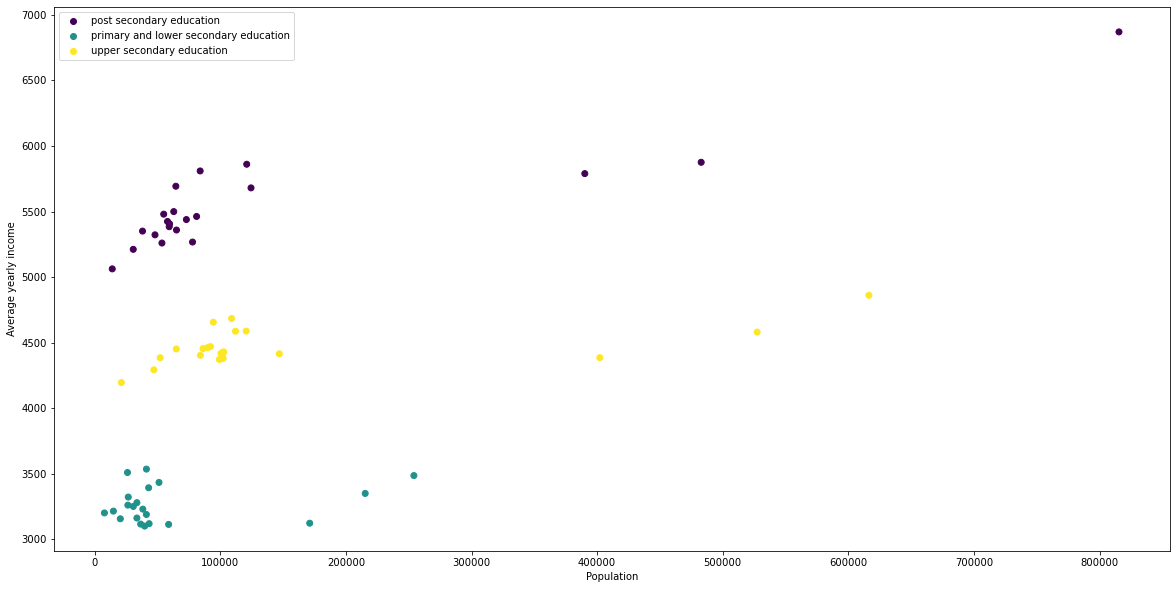

In [92]:
# Create a scatter plot which shows the relationship between the income and the population amount shown by education level. (Remember, only 2020)
categories = pd.Categorical(df_merged["level of education"])

plt.figure(figsize=(20,10))

scatter = plt.scatter(df_merged["2020_pop"], df_merged["2020_inc"], c=categories.codes)

plt.legend(handles=scatter.legend_elements()[0], labels=list(categories.categories.values))

plt.xlabel("Population")
plt.ylabel("Average yearly income")

plt.show()


From the scatter plot we can quite easily see that: 
1. The three categories are well separated, and higher education correlates with higher income
2. The higher the population (in 2020), the higher the mean income level as well
3. Most regions have a population of less than 200k

### Task 5

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as n

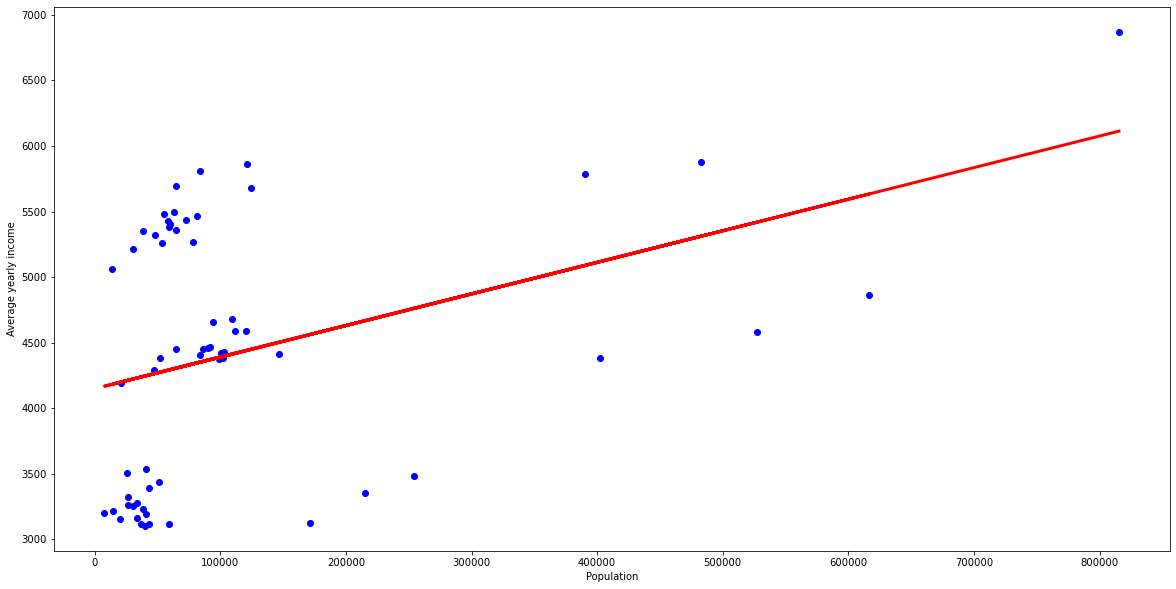

In [113]:
#
#  Do linear regression for all education levels of 2020 population vs income
#

# Get all X / Y values
train_x = df_merged[f"2020_pop"].values.reshape(-1, 1)
train_y = df_merged[f"2020_inc"].values

regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

# Make predictions using the testing set
pred_y = regr.predict(train_x)

# And plot the data + regression line
plt.figure(figsize=(20,10))

plt.scatter(train_x, train_y, color="blue")
plt.plot(train_x, pred_y, color="red", linewidth=3)

plt.xlabel("Population")
plt.ylabel("Average yearly income")

plt.show()

In [116]:
print("Predicted values for population points 20k & 80k", regr.predict(np.array([20000,80000]).reshape(-1,1)))

Predicted values for population points 20k & 80k [5349.87455111 5452.59162794]


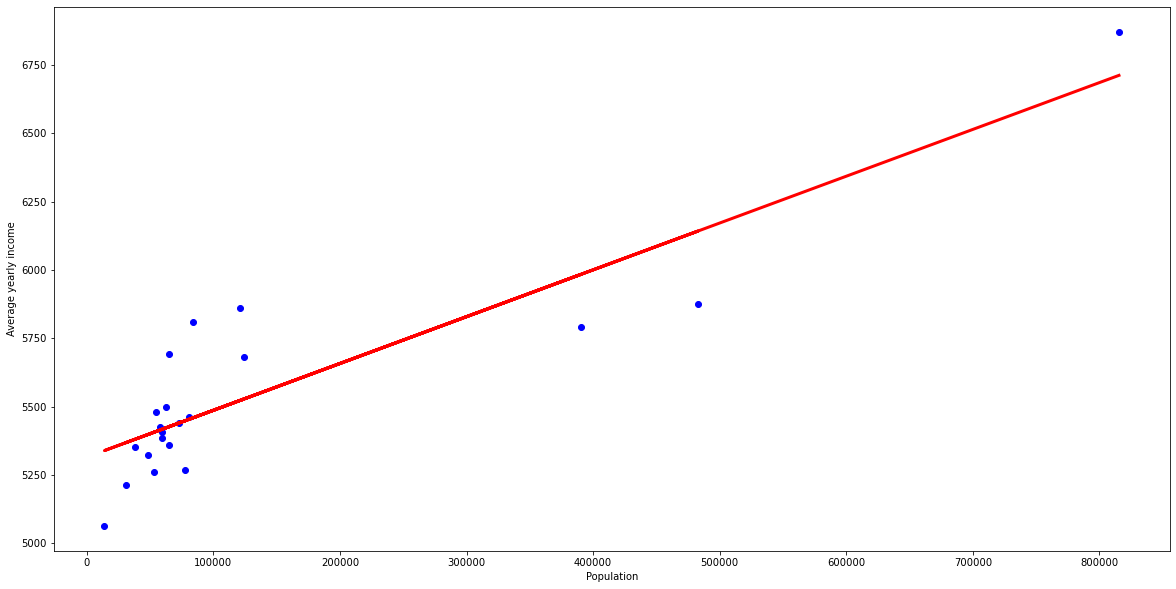

In [115]:
#
#  Do linear regression for post secondary education of 2020 population vs income
#
df_merged_post_secondary = df_merged[df_merged["level of education"] == "post secondary education"]
# Get all X / Y values
train_x = df_merged_post_secondary[f"2020_pop"].values.reshape(-1, 1)
train_y = df_merged_post_secondary[f"2020_inc"].values

regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

# Make predictions using the testing set
pred_y = regr.predict(train_x)

# And plot the data + regression line
plt.figure(figsize=(20,10))

plt.scatter(train_x, train_y, color="blue")
plt.plot(train_x, pred_y, color="red", linewidth=3)

plt.xlabel("Population")
plt.ylabel("Average yearly income")

plt.show()

In [117]:
print("Predicted values for population points 20k & 80k", regr.predict(np.array([20000,80000]).reshape(-1,1)))

Predicted values for population points 20k & 80k [5349.87455111 5452.59162794]


What differences can you see from the graphs and the predicted y values from both linear regressions?
- The predicted income values in the second graph (only showing post secondary education) fits the line better

Do you think a relationship between population density and income is useful? Which other elements would help to predict population income better?
- As seen in this lab, education level appears to be a strong predictor of population income
- Other likely predictors could be age and (unfortunately) gender
